In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
Train_Data = pd.read_csv("train.csv")

In [3]:
Test_Data = pd.read_csv("test.csv")

In [4]:
Test_Data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [5]:
Train_Data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [6]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Train_Data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

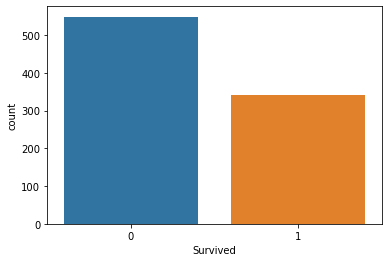

In [8]:
sns.countplot(x = 'Survived', data =Train_Data )

<AxesSubplot:xlabel='Pclass', ylabel='count'>

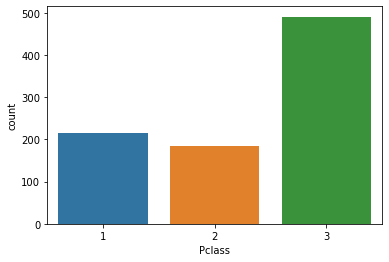

In [9]:
sns.countplot(x = 'Pclass', data = Train_Data )

<AxesSubplot:xlabel='Embarked', ylabel='count'>

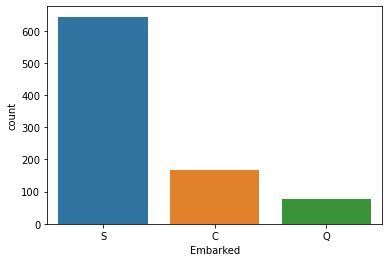

In [10]:
sns.countplot( x = 'Embarked', data = Train_Data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

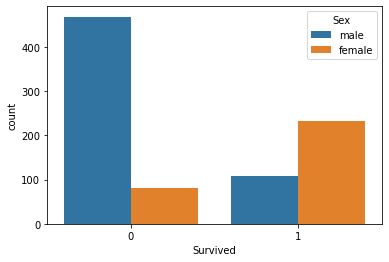

In [11]:
sns.countplot(x = 'Survived', hue = 'Sex', data = Train_Data)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

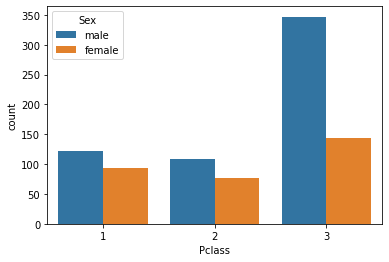

In [12]:
sns.countplot( data =Train_Data, x = 'Pclass', hue ='Sex')

<AxesSubplot:>

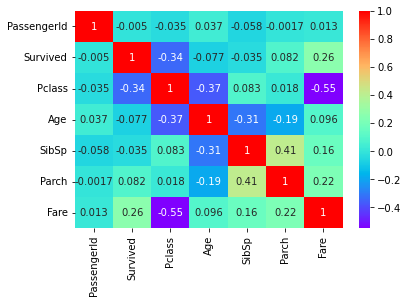

In [13]:
sns.heatmap(Train_Data.corr(), cmap = 'rainbow' , annot = True)

In [14]:
#filling missing values
Train_Data['Age'].fillna(Train_Data['Age'].median(), inplace = True)

In [15]:
# Categorical Features present in the dataset
Categorical_Features = Train_Data.select_dtypes(['object'])
Categorical_Features.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [16]:
# Numerical Features present in the dataset
Numerical_Features = Train_Data.select_dtypes(['float64','int64'])
Numerical_Features.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

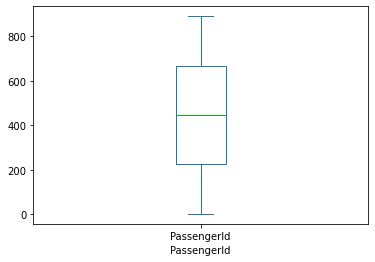

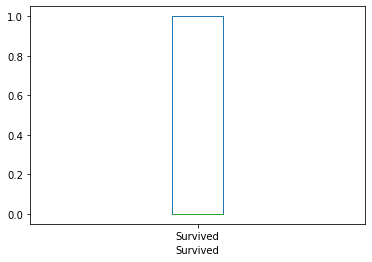

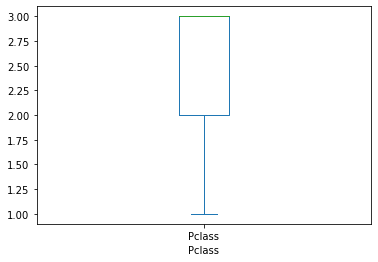

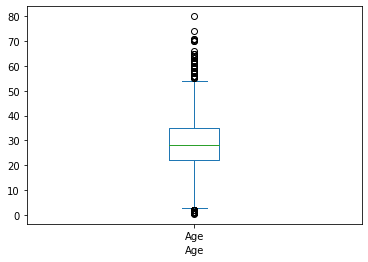

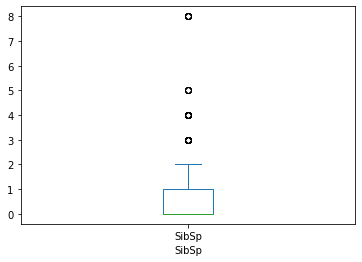

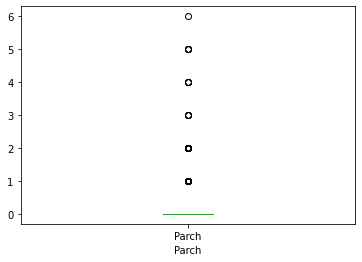

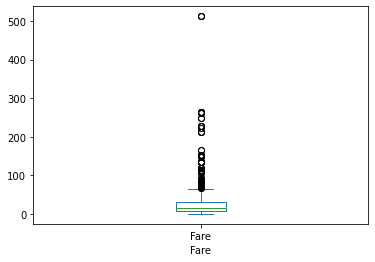

In [17]:
# box plot to detect outlier in dataset
for i in Numerical_Features.columns:
    Train_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

In [10]:
#outlier treatment
def outlier_var(x):
    if ((x.dtype=="float") or (x.dtype == "int64")):
        q1 = x.quantile(0.25)
        q3 = x.quantile(0.75)
        iqr = q3 - q1
        lc = q1 - 1.5 * iqr
        uc = q3 + 1.5 * iqr
        x = x.clip(lower = lc, upper = uc)
    else:
        x
    return x 

In [11]:
Train_Data  = Train_Data.apply(outlier_var)

In [12]:
# box plot after treating the detected outlier in dataset
for i in Numerical_Features.columns:
    Train_Data[i].plot.box()
    plt.xlabel(str(i))
    plt.show()

NameError: name 'Numerical_Features' is not defined

PassengerId
0.0


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


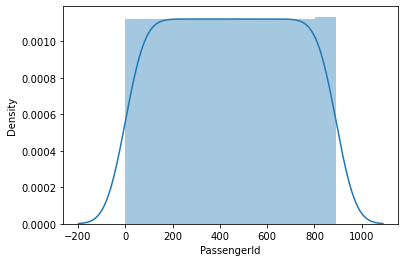

Survived
0.4777174662568536


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


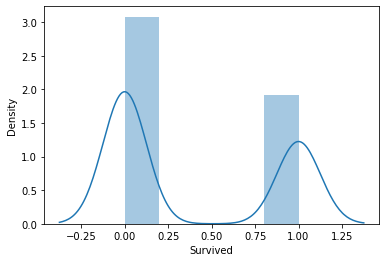

Pclass
-0.6294858816096934


c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


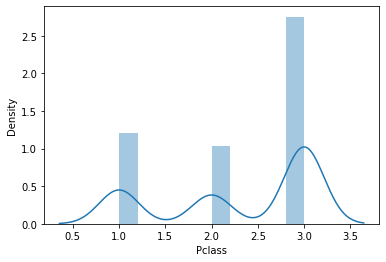

c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Age
0.5093852558219663


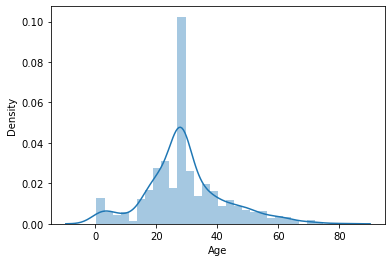

c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


SibSp
3.6891276847759507


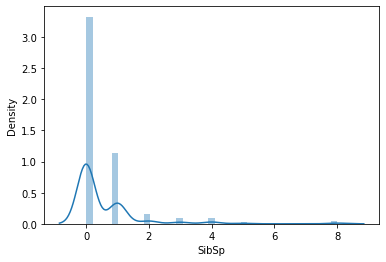

c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Parch
2.7444867379203735


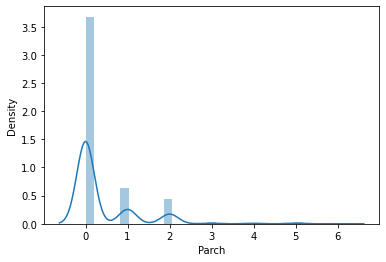

c:\Users\shubh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Fare
4.7792532923723545


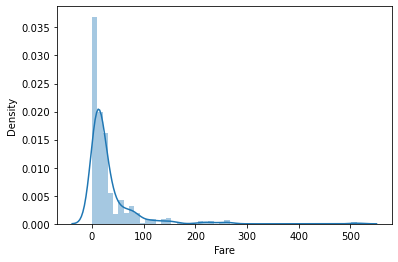

In [18]:
# distplot along with skrew value
from scipy.stats import skew
for col in Numerical_Features.columns:
    print(col)
    print(skew(Train_Data[col]))
    
    plt.figure()
    sns.distplot(Train_Data[col])
    plt.show()

As there are many Attributes which has skewed Datapoints, So we can use Random Forest Classifier for modelling as it works good with skew dataset.

In [19]:
Train_Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
import re
def get_prefix(name):
    prefix = re.search(' ([A-Za-z]+)\.', name)
    if prefix:
        return prefix.group(1)
    return ""

In [21]:
Train_Data['Name_prefix'] = Train_Data['Name'].apply(get_prefix)

In [22]:
Train_Data['Name_prefix'] = Train_Data['Name_prefix'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
Train_Data['Name_prefix'] = Train_Data['Name_prefix'].replace('Mlle', 'Miss')
Train_Data['Name_prefix'] = Train_Data['Name_prefix'].replace('Ms', 'Miss')
Train_Data['Name_prefix'] = Train_Data['Name_prefix'].replace('Mme', 'Mrs')

In [23]:
## create bin for age features
Train_Data['Age_bin'] = pd.cut(Train_Data['Age'], bins=[0,12,20,40,70], labels=['Children','Teenage','Adult','Elder'])


In [24]:
Train_Data['Fare_bin'] = pd.cut(Train_Data['Fare'], bins=[0,7.92,14.46,31,66], labels=['very_low_fare','low_fare','avg_fare','high_fare'])

Here family size  = sex + SibSp + Parch
so, family size = 1 + SibSp + Parch

In [25]:
Train_Data['Family_size'] = Train_Data['SibSp'] + Train_Data['Parch'] + 1

In [26]:
Train_Data.drop(columns=['Cabin'],inplace=True)

In [27]:
Train_Data.drop(columns=['Name','PassengerId'],inplace=True)

In [28]:
Train_Data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_prefix,Age_bin,Fare_bin,Family_size
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,Mr,Adult,very_low_fare,2
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,Mrs,Adult,NaN,2
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Adult,low_fare,1
3,1,1,female,35.0,1,0,113803,53.1000,S,Mrs,Adult,high_fare,2
4,0,3,male,35.0,0,0,373450,8.0500,S,Mr,Adult,low_fare,1


In [29]:
Train_Data.dropna(inplace=True)

In [30]:
Train_Data.drop(columns=['Ticket'],inplace=True)

In [31]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Survived     755 non-null    int64   
 1   Pclass       755 non-null    int64   
 2   Sex          755 non-null    object  
 3   Age          755 non-null    float64 
 4   SibSp        755 non-null    int64   
 5   Parch        755 non-null    int64   
 6   Fare         755 non-null    float64 
 7   Embarked     755 non-null    object  
 8   Name_prefix  755 non-null    object  
 9   Age_bin      755 non-null    category
 10  Fare_bin     755 non-null    category
 11  Family_size  755 non-null    int64   
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 66.8+ KB


In [32]:
#converting Categorical features to Numerical Features
Train_Data = pd.get_dummies(Train_Data, columns = ["Sex","Name_prefix","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_bin_type","Embarked_type","Fare_bin_type"])

In [33]:
Train_Data.isnull().sum()

Survived                       0
Pclass                         0
Age                            0
SibSp                          0
Parch                          0
Fare                           0
Family_size                    0
Sex_female                     0
Sex_male                       0
Title_Master                   0
Title_Miss                     0
Title_Mr                       0
Title_Mrs                      0
Title_Rare                     0
Age_bin_type_Children          0
Age_bin_type_Teenage           0
Age_bin_type_Adult             0
Age_bin_type_Elder             0
Embarked_type_C                0
Embarked_type_Q                0
Embarked_type_S                0
Fare_bin_type_very_low_fare    0
Fare_bin_type_low_fare         0
Fare_bin_type_avg_fare         0
Fare_bin_type_high_fare        0
dtype: int64

In [34]:
X = Train_Data.drop( 'Survived', axis=1)
Y = Train_Data.Survived

In [35]:
X.shape

(755, 24)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,
                                                test_size=0.3,
                                                random_state=42,
                                                stratify=Y
                                                )

Model: Random Forest Classifier

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [40]:
Model=RandomForestClassifier(random_state=10,max_depth=6,n_estimators=200)

In [ ]:
#CV_rfc = GridSearchCV(estimator=Classifer, param_grid=param_grid, cv= 3)
#CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 15, 20, 25, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [300, 500, 700]})

In [132]:
#CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 500}

In [133]:
#Model=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 300, max_depth=15, criterion='gini')

In [41]:
Model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=200, random_state=10)

In [42]:
pred=Model.predict(X_test)

In [43]:
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':pred})
df.head()

,Real Values,Predicted Values
141,1,1
826,0,1
382,0,0
98,1,1
312,0,1


In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       149
           1       0.66      0.73      0.70        78

    accuracy                           0.78       227
   macro avg       0.76      0.77      0.76       227
weighted avg       0.79      0.78      0.78       227



In [46]:
#Training accuracy
from sklearn.metrics import accuracy_score
X_train_pred = Model.predict(X_train)
train_acc = accuracy_score(X_train_pred,y_train)
print("Training accuracy is {}".format(train_acc))
X_test_pred = Model.predict(X_test)
test_acc = accuracy_score(X_test_pred,y_test)
print("Testing accuracy is {}".format(test_acc))

Training accuracy is 0.8617424242424242
Testing accuracy is 0.7797356828193832
